In [93]:
import pandas as pd

In [98]:
BIKE = pd.read_csv('Bike.csv')

In [101]:
BIKE

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [119]:
BIKE.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

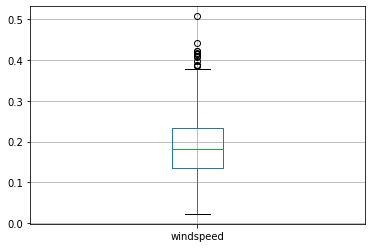

In [162]:
BIKE.boxplot(['windspeed'])

# Removing outliers Using IQR

In [163]:
Q1 = BIKE.windspeed.quantile(0.25)
Q3 = BIKE.windspeed.quantile(0.75)
print(Q1,Q3)

0.13495 0.2332145


In [164]:
IQR = Q3-Q1
print(IQR)

0.0982645


In [165]:
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print(lower,upper)

-0.012446750000000034 0.38061125


In [166]:
df = BIKE[(BIKE.windspeed<upper) | (BIKE.windspeed<lower)]

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     718 non-null    int64  
 1   dteday      718 non-null    object 
 2   season      718 non-null    int64  
 3   yr          718 non-null    int64  
 4   mnth        718 non-null    int64  
 5   holiday     718 non-null    int64  
 6   weekday     718 non-null    int64  
 7   workingday  718 non-null    int64  
 8   weathersit  718 non-null    int64  
 9   temp        718 non-null    float64
 10  atemp       718 non-null    float64
 11  hum         718 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      718 non-null    int64  
 14  registered  718 non-null    int64  
 15  cnt         718 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 95.4+ KB


<AxesSubplot:>

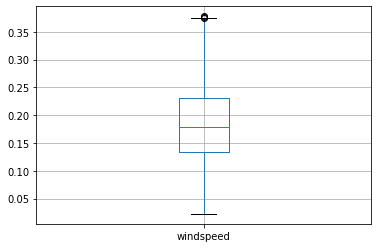

In [168]:
df.boxplot(['windspeed'])

# Removing outliers Using Z-score

<AxesSubplot:>

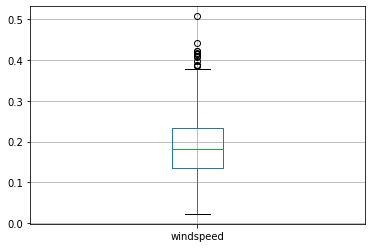

In [169]:
BIKE.boxplot(['windspeed'])

In [193]:
BIKE['zscore'] = ( df.windspeed - df.windspeed.mean() ) / df.windspeed.std()

In [194]:
BIKE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           731 non-null    int64  
 1   dteday            731 non-null    object 
 2   season            731 non-null    int64  
 3   yr                731 non-null    int64  
 4   mnth              731 non-null    int64  
 5   holiday           731 non-null    int64  
 6   weekday           731 non-null    int64  
 7   workingday        731 non-null    int64  
 8   weathersit        731 non-null    int64  
 9   temp              731 non-null    float64
 10  atemp             731 non-null    float64
 11  hum               731 non-null    float64
 12  windspeed         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registered        731 non-null    int64  
 15  cnt               731 non-null    int64  
 16  windspeed_zscore  731 non-null    float64
 1

In [195]:
df_zscore = BIKE[BIKE['zscore']<3]

In [196]:
df_zscore

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_zscore,zscore
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.387626,-0.361407
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.749089,0.865666
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.746121,0.862463
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.389562,-0.363496
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.046275,0.007079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2.060015,2.280799
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0.451822,-0.430705
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0.852968,-0.863739
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2.068028,2.289449


<AxesSubplot:>

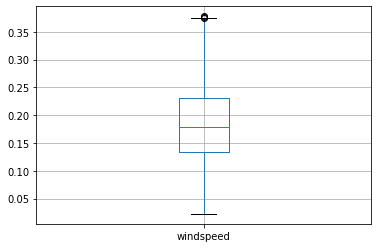

In [197]:
df_zscore.boxplot(['windspeed'])